In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
# Шаг 1, вложение
# L - Длина окна
# K - Количество векторов вложения (K = N - L + 1)
# Row - Исходный временной ряд
def embed(L, K, Row):
    X = np.zeros((L, K), float)
    for i in range(L):
        for j in range(K):
            X[i][j] = Row[i+j]
    return X

In [3]:
# Шаг 2,Сингулярное разложение
# X - Траекторная матрица
# U - Собственные векторы
# V - Факторные векторы
# lam - сингулярные числа
def svd(X):
    U,lam,V = np.linalg.svd(X)
    print( 'lam\n', lam)
    print('U\n', U)
    print('V\n', V)
    return U, lam, V

In [4]:
# Формирование матрицы из собственных векторов
# L - Длина окна
# K - Количество векторов вложения (K = N - L + 1)
# lam - сингулярные числа
# matrixlambda - матрица из собственных векторов
def matrixlambda_create(L, K, lam):
    matrixlambda = np.zeros((L, K), float)
    for i in range(len(lam)):
        matrixlambda[i][i] = lam[i]
    return matrixlambda

In [5]:
# Функция для получения элементарных матриц разложения
# U - Собственные векторы
# V - Факторные векторы
# matrixlambda - матрица из собственных векторов
# Xi - элементарная матрица разложения
def decompose(U, V, matrixlambda, i):
    U = U.T
    Xi = U[i][np.newaxis]
    Xi = Xi.T
    matrixlambda = matrixlambda[i][np.newaxis]
    Xi = Xi.dot(matrixlambda)
    Xi = Xi.dot(V)
    return Xi

In [6]:
# Шаг 4 Диагональное усреднение
# matrix = сгруппированная матрица, соотвутствующая одной компоненте
# g - временной ряд, соответствующий сгрупированной матрице
def diagonalAverage(matrix):
    if(L>K):
        matrix = matrix.T
    g = np.zeros(N, float)
    for k in range(0,L-1):
        sum = 0
        m = 1
        while(m <= k+1):
            sum += matrix[m-1][k-m+1]
            m += 1
        g[k] = (1/(k+1))*sum
    
    for k in range(L-1,K):
        sum = 0
        m = 1
        while(m <= L):
            sum += matrix[m-1][k-m+1]
            m += 1
        g[k] = (1/L)*sum
    
    for k in range(K,N):
        sum = 0
        m = k - K + 2
        while(m <= N - K + 1):
            sum += matrix[m-1][k-m+1]
            m += 1
        g[k] = (1/(N-k))*sum

    return g

In [7]:
# Фнункция сглаживания ряда методом скользящего среднего
# x - массив данных
# N - Число соседей, по котоорым производится сглаживание
def moving_average(x, N):
    out = np.zeros_like(x, dtype=np.float64)
    dim_len = x.shape[0]
    for i in range(dim_len):
        if N%2 == 0:
            a, b = i - (N-1)//2, i + (N-1)//2 + 2
        else:
            a, b = i - (N-1)//2, i + (N-1)//2 + 1
        a = max(0, a)
        b = min(dim_len, b)
        out[i] = np.mean(x[a:b])
    return out

In [8]:
# Считаем файл с данными
TimeRow = pd.read_csv('AvgTemp_2002_2020.csv')
date = TimeRow['date'].values
temp = TimeRow['avg'].values

# Преобразование типа Дата для динамического отображения даты на графиках
date = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in date]

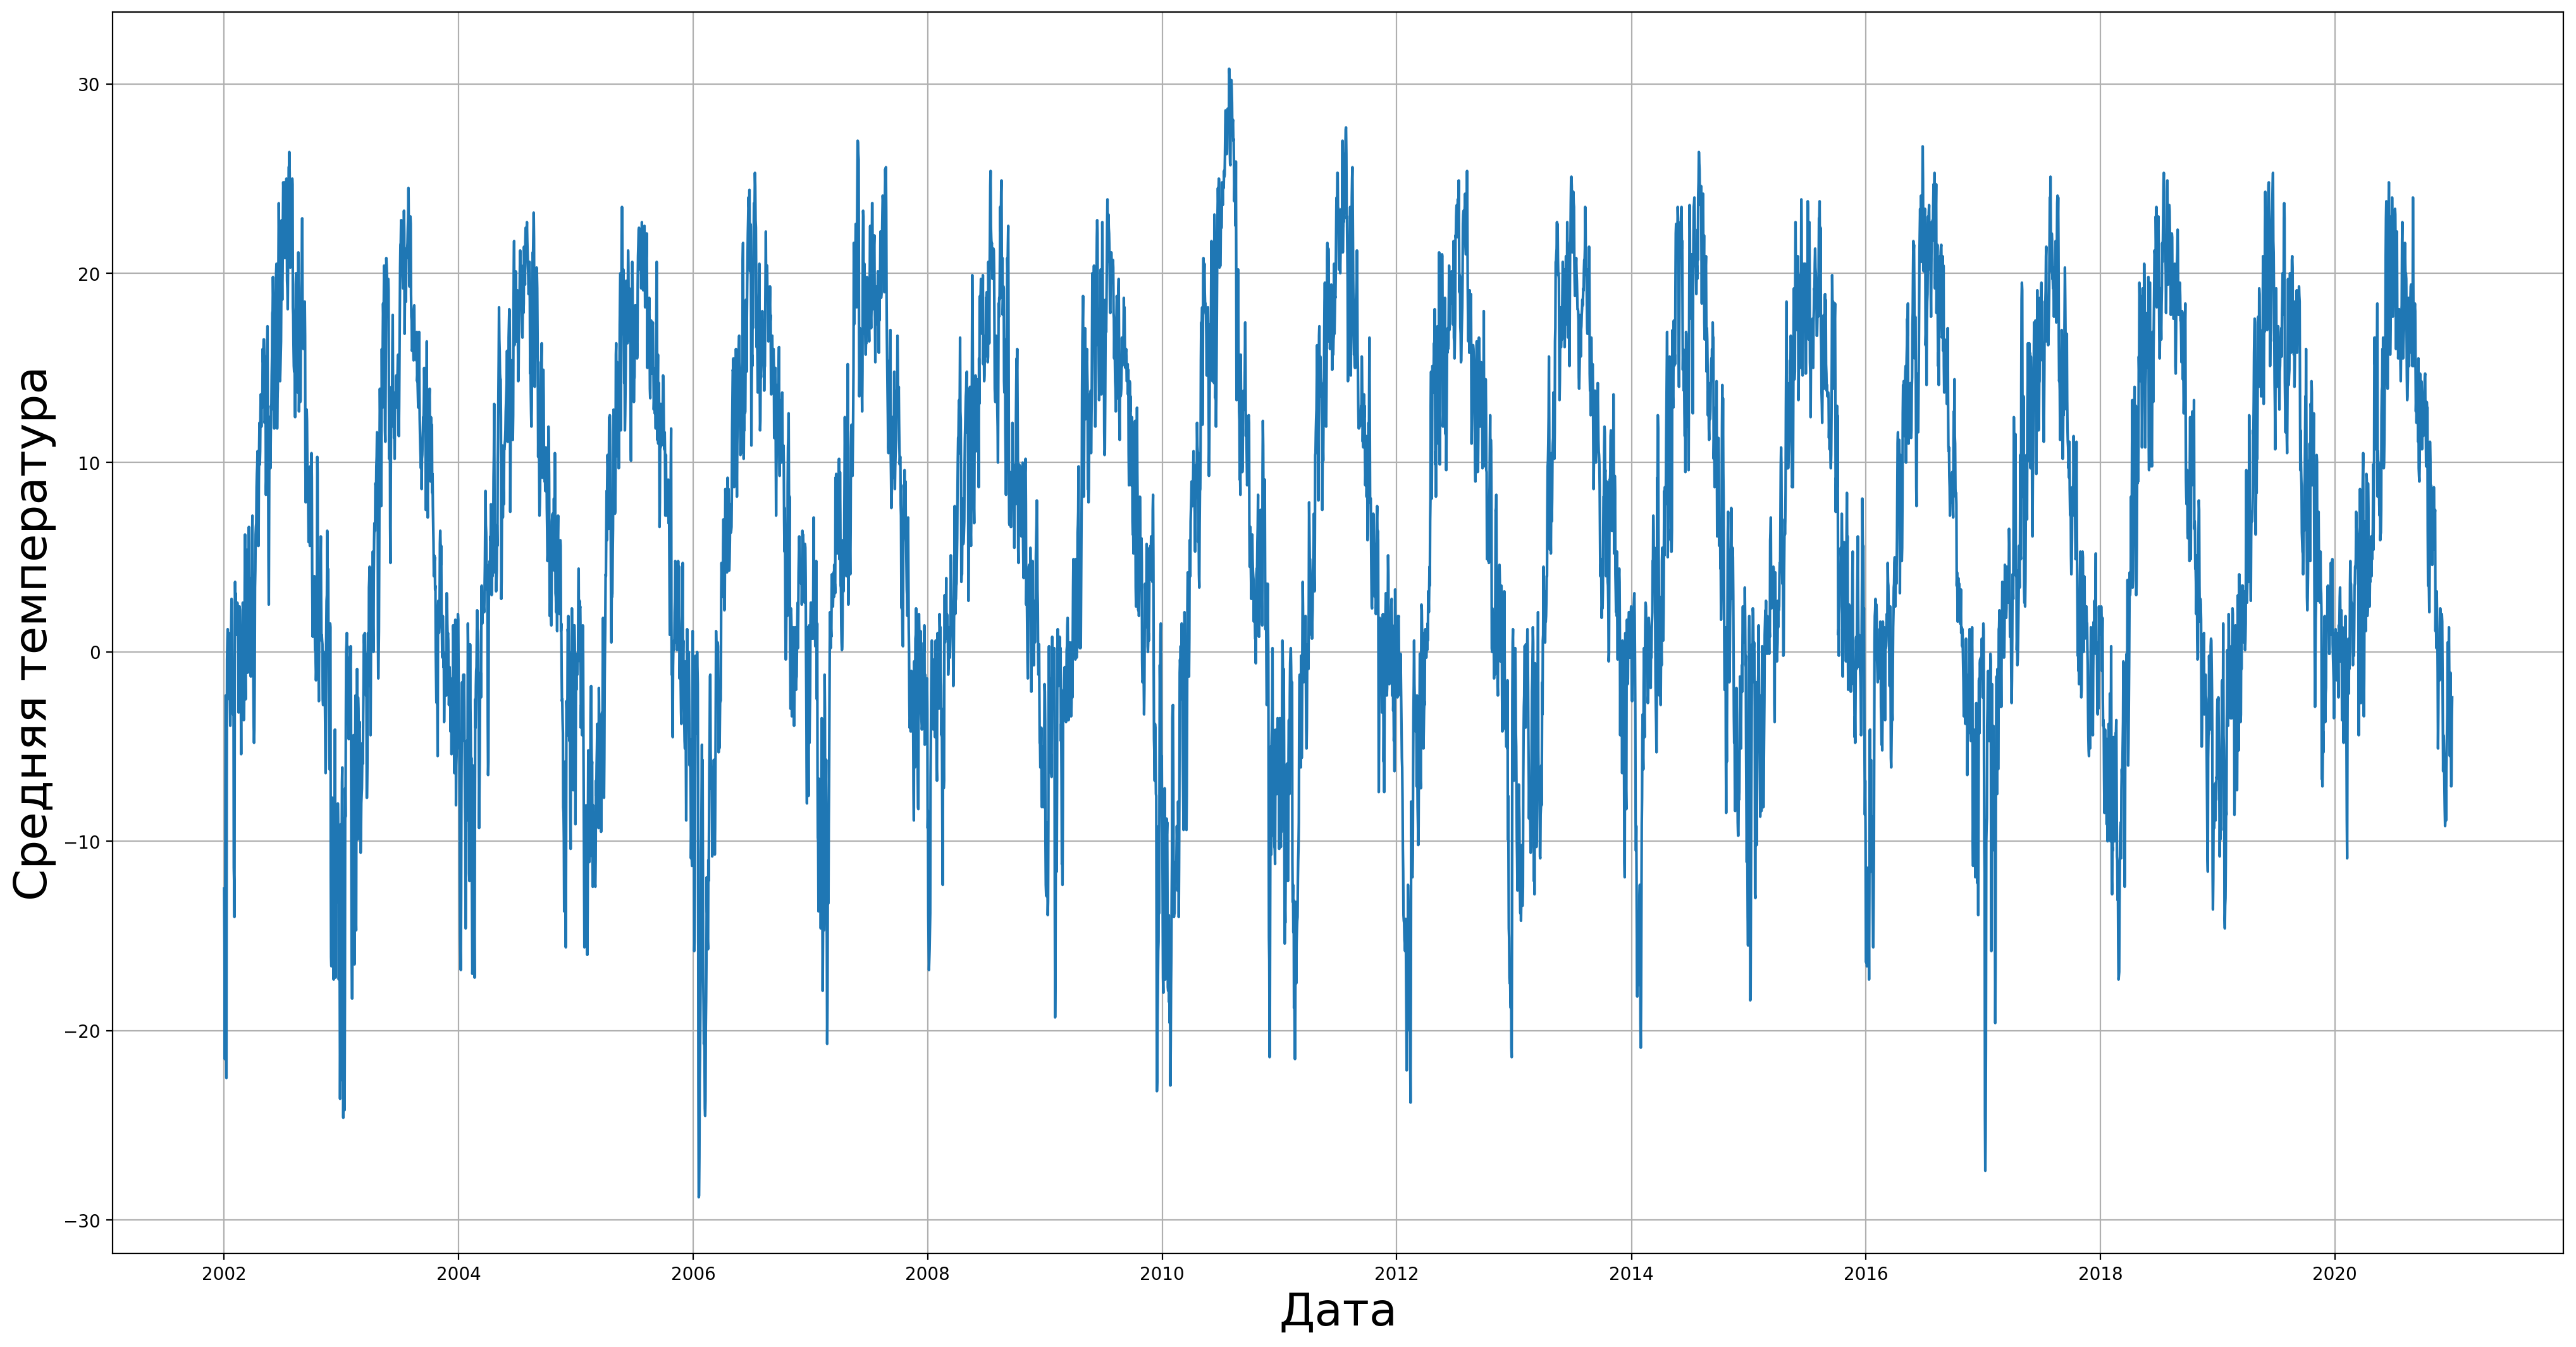

In [9]:
# График исходного временного ряда
plt.figure(figsize=(25, 13), dpi=200)
plt.plot(date,temp)
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24) 
plt.xlabel('Дата', size=26) 
plt.ylabel('Средняя температура', size=26)
plt.grid()

In [10]:
# Зададим параметр длина окна
N = len(temp)    #Длина ряда
L = 365    #Длина окна
K = N - L + 1    #Количество векторов вложения

print("Длина ряда N:", N)
print("Длина окна L:", L)
print("Количество векторов вложения K:", K)

Длина ряда N: 6940
Длина окна L: 365
Количество векторов вложения K: 6576


In [11]:
# Шаг 1, вложение
# Получаем траекторную матрицу X
X = embed(L, K, temp)
print(X)

[[-12.5 -15.4 -21.5 ...   1.   -0.6   0.1]
 [-15.4 -21.5 -16.3 ...  -0.6   0.1   1.2]
 [-21.5 -16.3  -7.  ...   0.1   1.2  -0.8]
 ...
 [-20.4  -9.1 -12.5 ...  -4.9  -7.1  -7. ]
 [ -9.1 -12.5 -22.6 ...  -7.1  -7.   -3.6]
 [-12.5 -22.6 -10.6 ...  -7.   -3.6  -2.4]]


In [12]:
# Шаг 2, сингулярное разложение
# U - Собственные векторы
# V - Факторные векторы
# lam - сингулярные числа
U,lam,V = svd(X)

lam
 [10439.06192154 10405.62129745 10328.41609991  1291.55032778
  1272.54431949  1264.96536962  1177.23725804  1138.84291455
  1134.418729    1067.41368051  1054.46838825   987.52151428
   921.84303876   886.56296565   855.5595093    827.52146209
   823.30658215   806.55509182   805.6510378    789.44968687
   778.87432899   765.73757835   753.07238496   739.81327292
   738.97119235   726.21675893   710.04045609   708.18744723
   703.13264342   699.90300087   695.06390077   681.71499692
   680.83368548   668.37315044   629.55993685   607.44529153
   602.35301628   594.48826803   592.29957296   584.32286965
   575.26389857   574.51107592   556.5642251    541.09491993
   537.25706204   528.01345626   527.71208119   523.19552202
   520.68585254   516.53311473   515.00856865   513.87253016
   510.58304727   508.61423752   476.58791617   473.02752121
   472.11876295   470.87708827   469.26722412   437.78649569
   431.47565328   428.47062846   421.73637007   415.19716393
   414.17068391   4

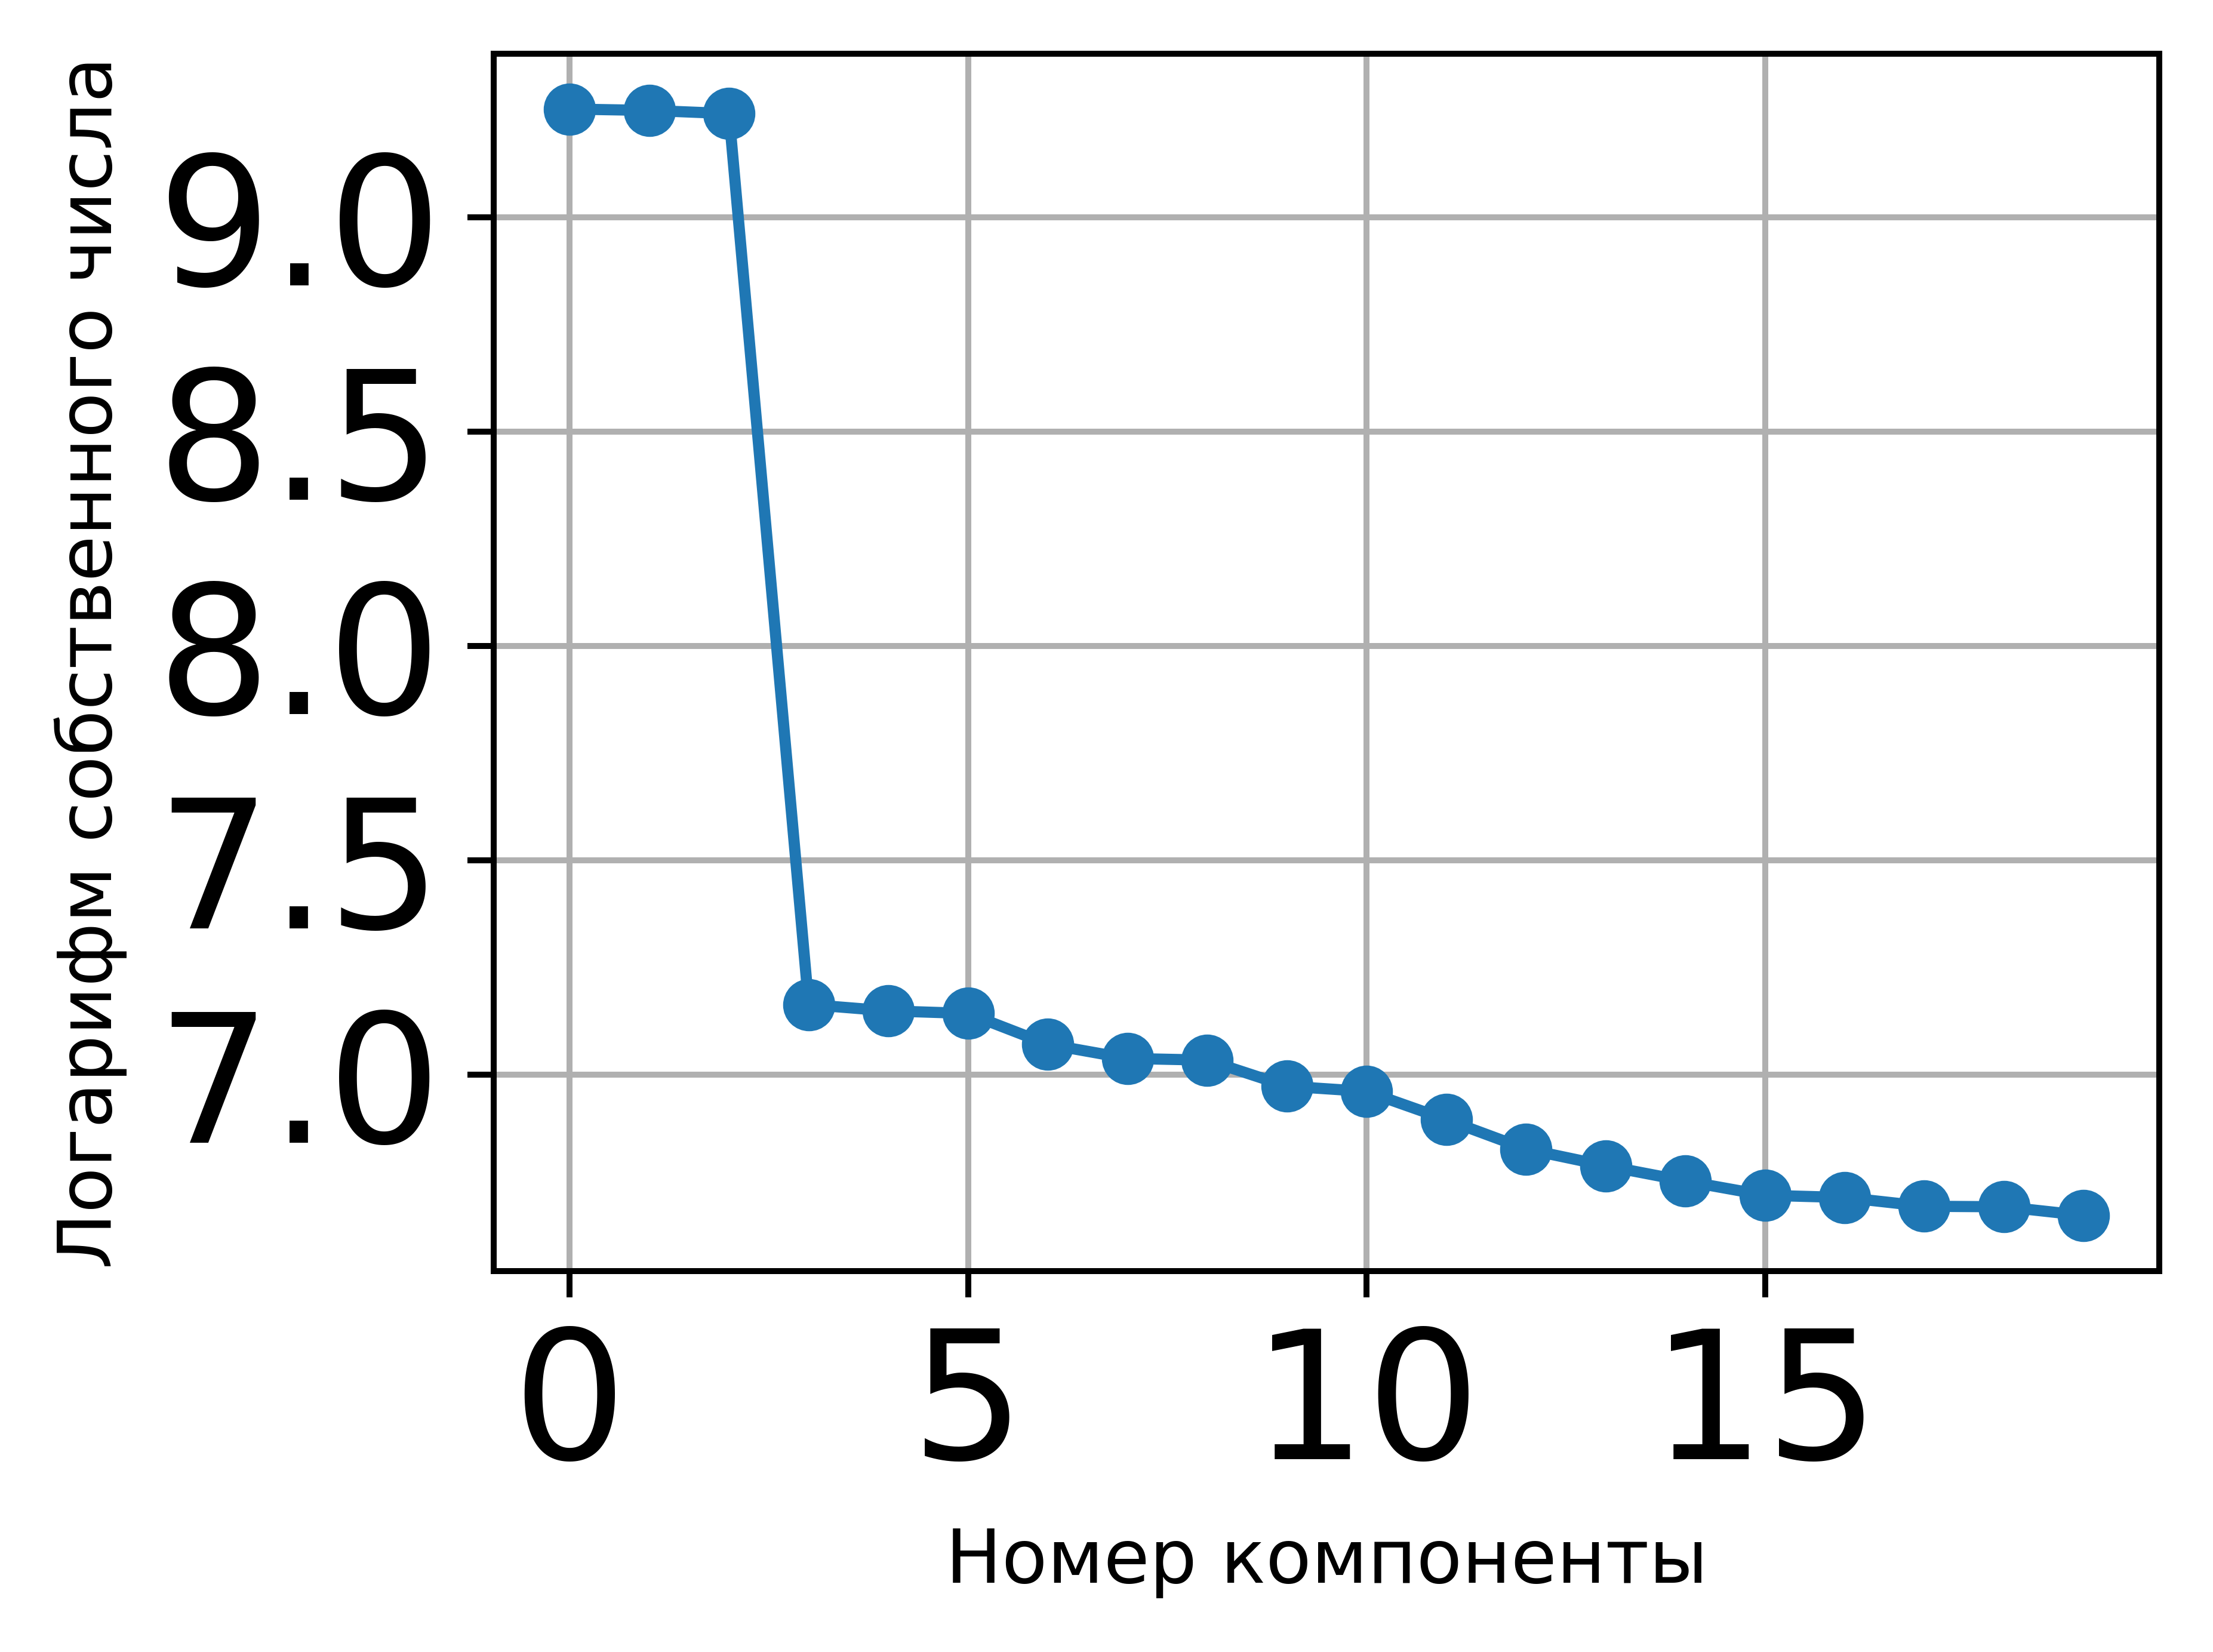

In [13]:
# График логарифмов первых 20 собственных чиселё
plt.figure( figsize=(4, 3), dpi=900)
plt.plot(np.log(lam[:20]), '-o')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlabel('Номер компоненты') 
plt.ylabel('Логарифм собственного числа')
plt.grid()

In [14]:
# Формируем матрицу из собственных векторов
matrixlambda = matrixlambda_create(L, K, lam)
matrixlambda

array([[10439.06192154,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 10405.62129745,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        , 10328.41609991, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [15]:
# Xdecopmp - массив всех элементарных матриц разложения
Xdecomp = [decompose(U, V, matrixlambda, i) for i in range(L)]

In [16]:
# Проверка корректности разложения
# Сумма всех элементарных матриц должна быть равна траекторной матрице
sum(Xdecomp)

array([[-12.5, -15.4, -21.5, ...,   1. ,  -0.6,   0.1],
       [-15.4, -21.5, -16.3, ...,  -0.6,   0.1,   1.2],
       [-21.5, -16.3,  -7. , ...,   0.1,   1.2,  -0.8],
       ...,
       [-20.4,  -9.1, -12.5, ...,  -4.9,  -7.1,  -7. ],
       [ -9.1, -12.5, -22.6, ...,  -7.1,  -7. ,  -3.6],
       [-12.5, -22.6, -10.6, ...,  -7. ,  -3.6,  -2.4]])

In [17]:
# Проверка. Ранг каждой элементарной матрицы должен быть равен 1
for Xi in Xdecomp:
    print(LA.matrix_rank(Xi)) 

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


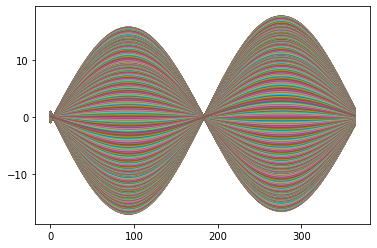

In [18]:
# Графическое представление первой элементарной тройки
plt.plot(Xdecomp[0]) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

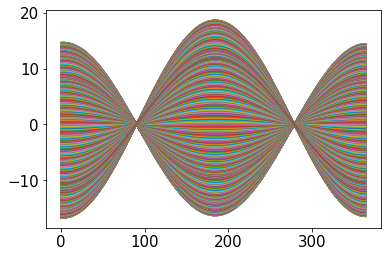

In [19]:
# Графическое представление второй элементарной тройки
plt.plot(Xdecomp[1]) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

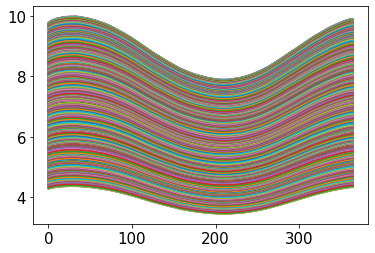

In [20]:
# Графическое представление третьей элементарной тройки
plt.plot(Xdecomp[2]) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

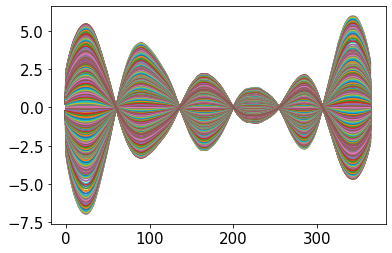

In [21]:
# Графическое представление четвертой элементарной тройки
plt.plot(Xdecomp[3]) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

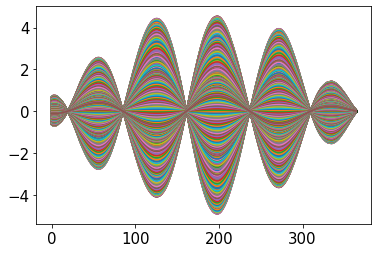

In [22]:
# Графическое представление пятой элементарной тройки
plt.plot(Xdecomp[4]) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

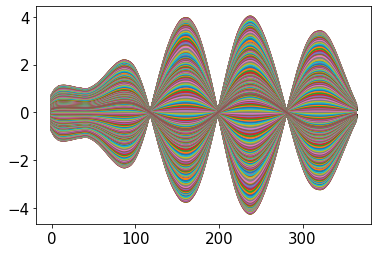

In [23]:
# Графическое представление шестой элементарной тройки
plt.plot(Xdecomp[5]) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

In [24]:
# Шаг 3. Группировка
# Основываясь на графическом виде элементарных троек, выполняем группировку 

# Компонента периода
Xperiod = Xdecomp[0] + Xdecomp[1]

# Компонента тренда
Xtrend = Xdecomp[2]

# Компонента шума
Xnoize = sum(Xdecomp[3:])
print('Xperiod\n', Xperiod)
print('Xternd\n', Xtrend)
print('Xnoize\n', Xnoize)

Xperiod
 [[-13.61589815 -13.67990978 -13.66752998 ... -10.37899412 -10.45564634
  -10.51564337]
 [-13.63894498 -13.69888068 -13.6824405  ... -10.44451486 -10.51817466
  -10.57516017]
 [-13.65402938 -13.7098507  -13.68935639 ... -10.50397768 -10.57459948
  -10.62853764]
 ...
 [-13.37946468 -13.45872429 -13.46235267 ... -10.01128383 -10.09881193
  -10.16993853]
 [-13.39268557 -13.46785656 -13.46746583 ... -10.06893061 -10.15343598
  -10.22153268]
 [-13.40227783 -13.47333989 -13.4689302  ... -10.12384869 -10.20530847
  -10.27035686]]
Xternd
 [[5.94215807 5.91466745 5.9361006  ... 8.09865829 8.08502662 8.08064205]
 [5.95451916 5.92697135 5.94844908 ... 8.11550539 8.10184537 8.09745168]
 [5.96529255 5.9376949  5.95921149 ... 8.13018862 8.11650388 8.11210224]
 ...
 [6.01328714 5.98546745 6.00715715 ... 8.19560117 8.18180633 8.17736928]
 [6.01535939 5.98753011 6.00922729 ... 8.19842548 8.18462588 8.1801873 ]
 [6.01487619 5.98704915 6.00874458 ... 8.19776692 8.18396844 8.17953021]]
Xnoize
 [[ 

In [25]:
# Шаг 4. Диагональное усреднение
fperiod = diagonalAverage(Xperiod)
ftrend = diagonalAverage(Xtrend)
fnoize = diagonalAverage(Xnoize)
print('fperiod\n', fperiod)
print('ftrend\n', ftrend)
print('fnoize\n', fnoize)

fperiod
 [-13.61589815 -13.65942738 -13.67348001 ... -10.1490744  -10.21342057
 -10.27035686]
ftrend
 [5.94215807 5.93459331 5.94278817 ... 8.18658736 8.18207787 8.17953021]
fnoize
 [ -4.82625992  -7.67516593 -13.76930815 ...  -5.03751296  -1.56865729
  -0.30917334]


In [26]:
# Проверка. Сумма восстановленных компонент должна быть равна исходному ряду
f = fperiod + ftrend + fnoize
f

array([-12.5, -15.4, -21.5, ...,  -7. ,  -3.6,  -2.4])

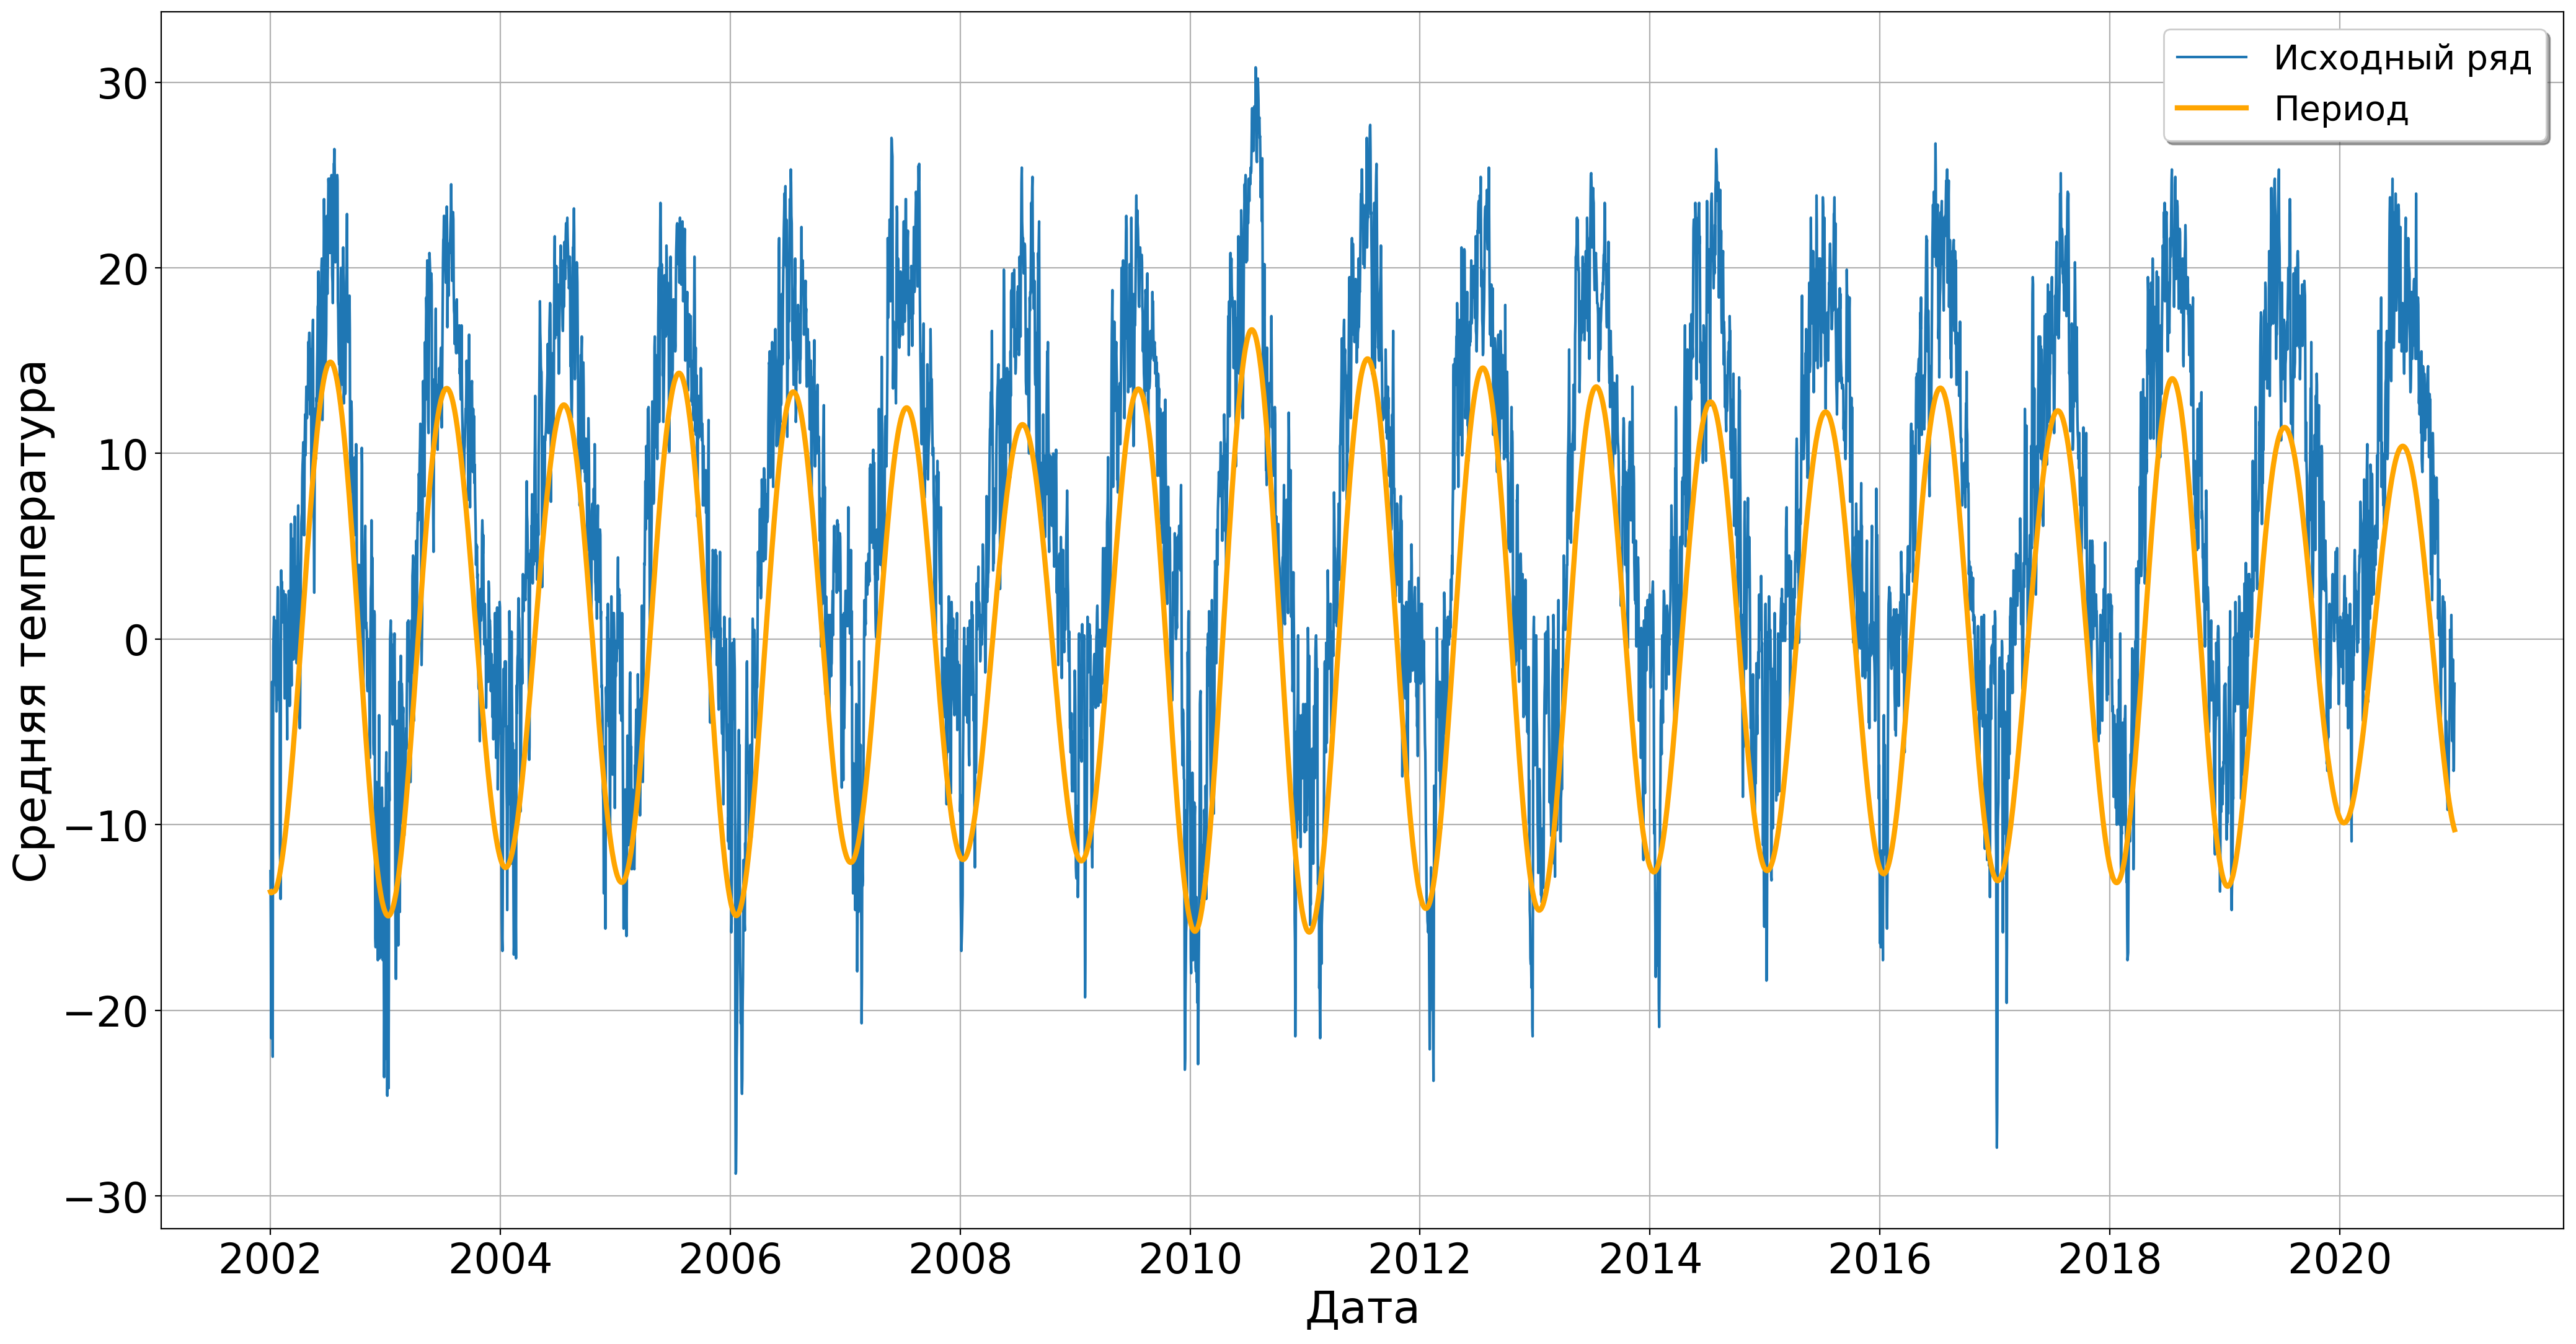

In [33]:
# График компоненты периода
plt.figure(figsize=(25, 13), dpi=200)
plt.plot(date,temp)
plt.plot(date,fperiod, color='orange', linewidth=3)
plt.legend(['Исходный ряд', 'Период'], shadow=True, fontsize=20)
plt.rc('xtick', labelsize=26) 
plt.rc('ytick', labelsize=26) 
plt.xlabel('Дата', size=26) 
plt.ylabel('Средняя температура', size=26)
plt.grid()

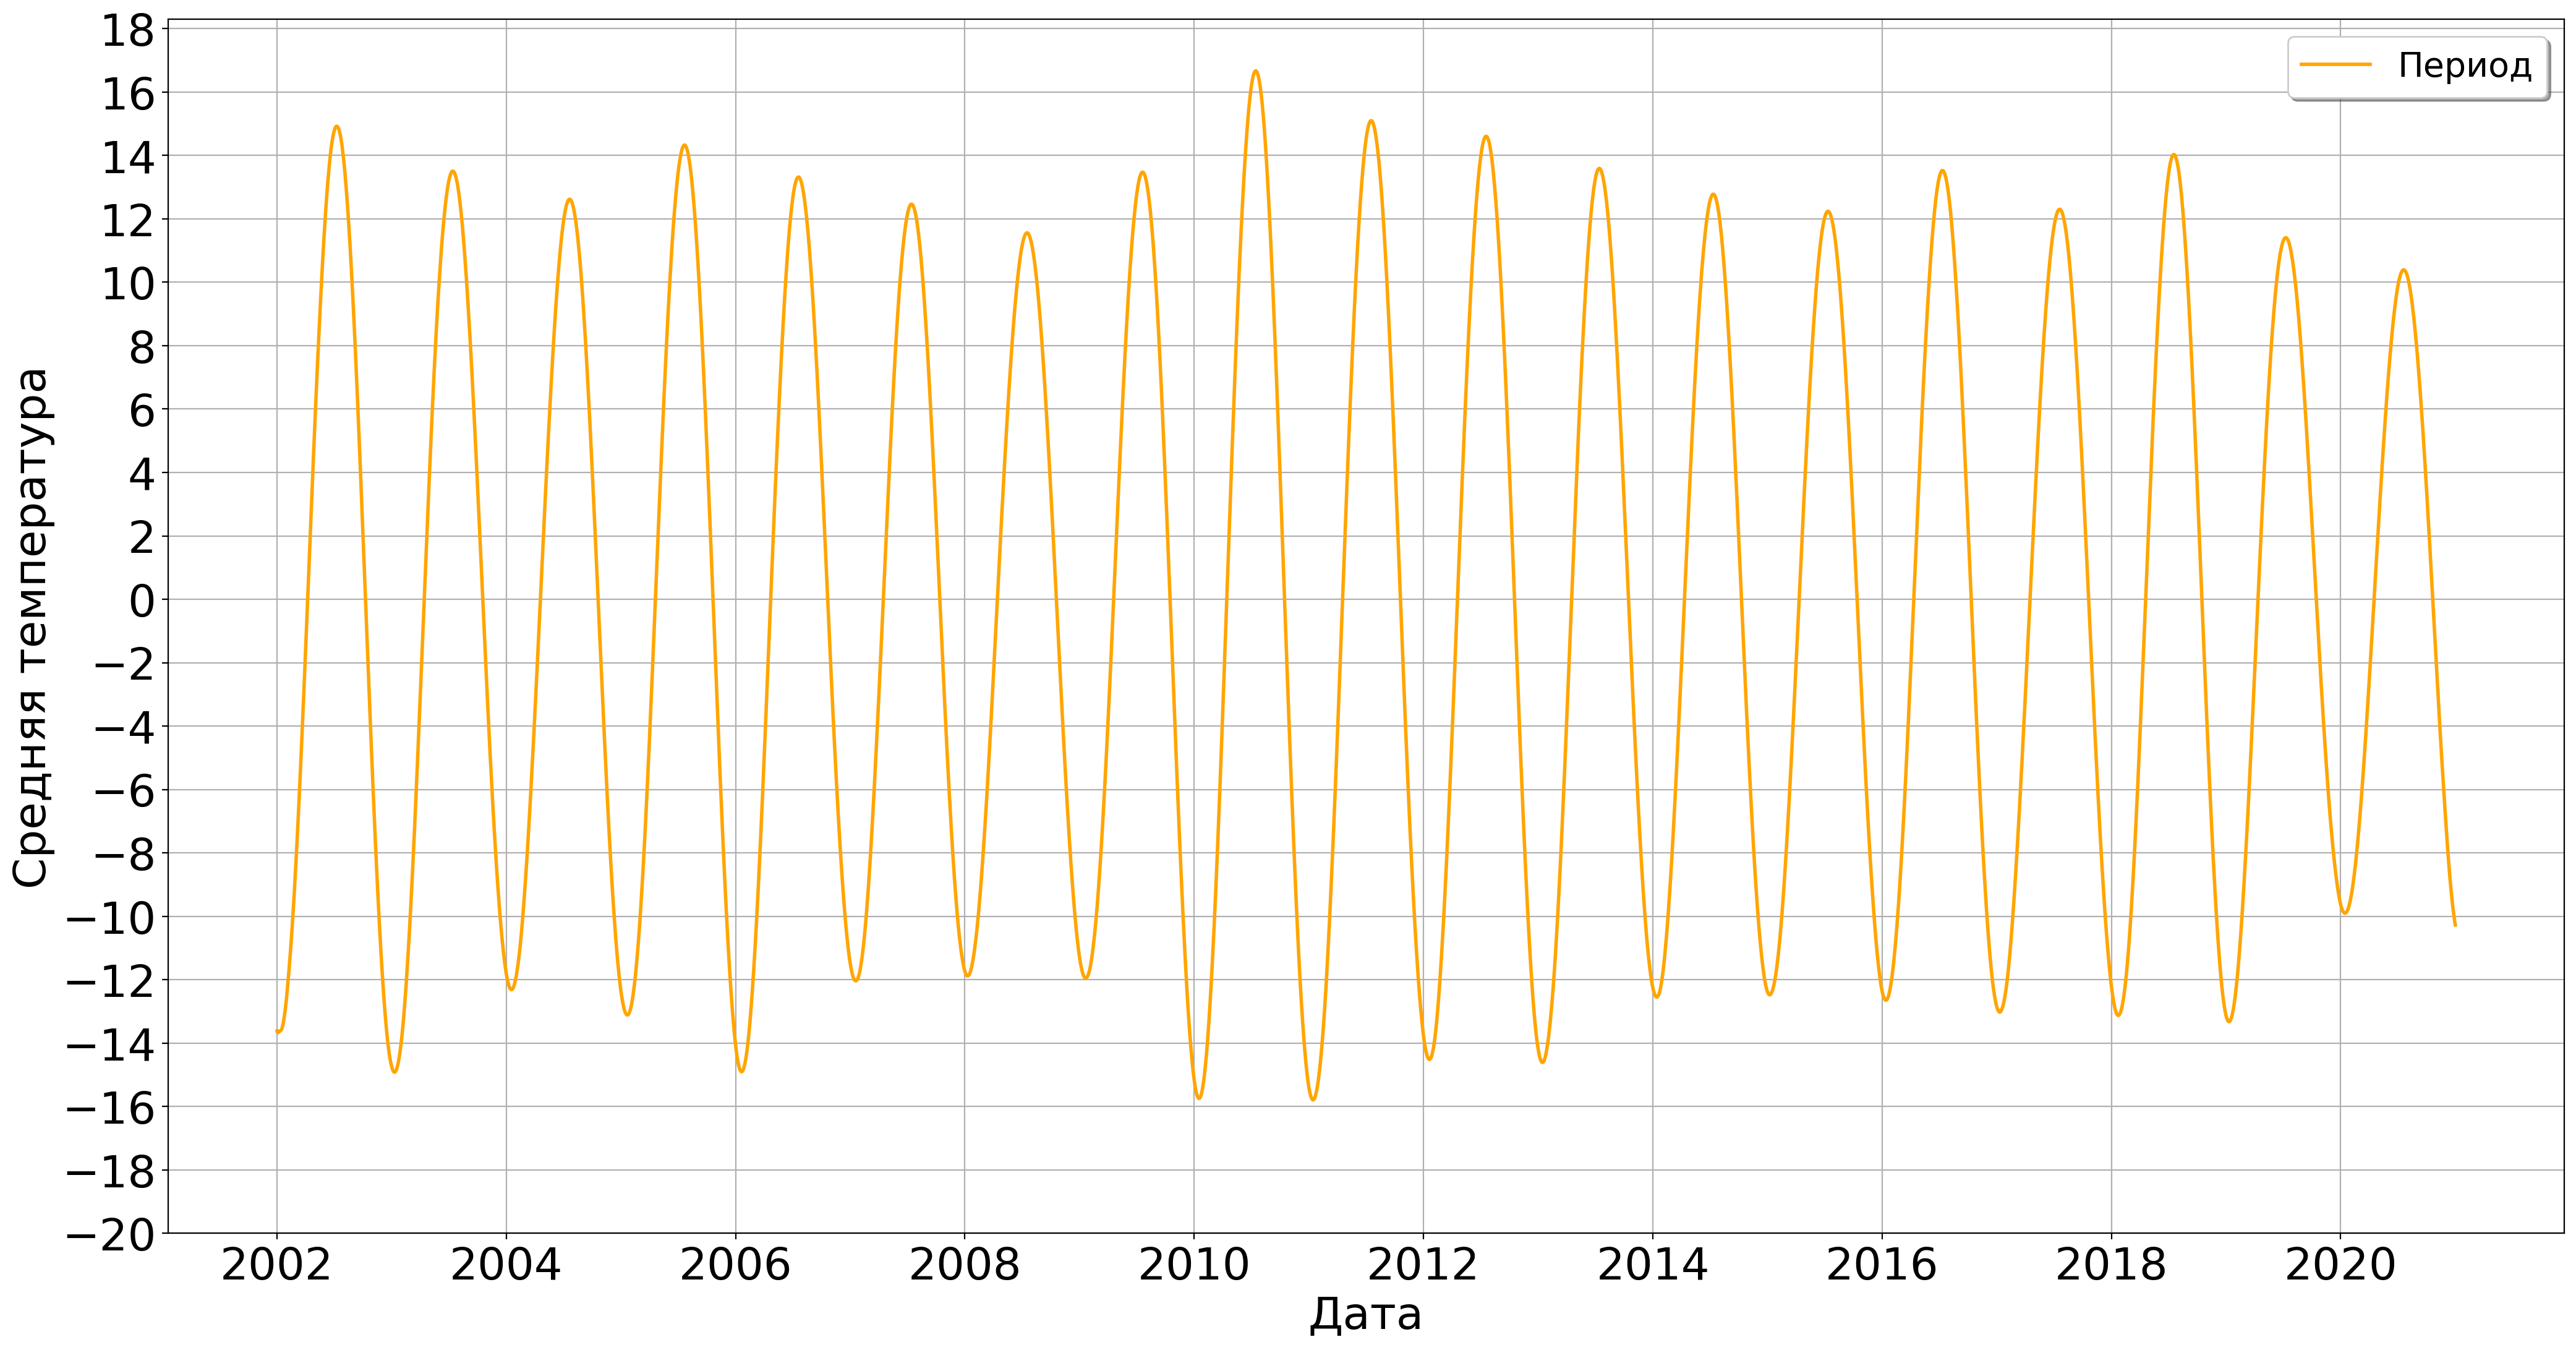

In [28]:
# Детализированный рафик компоненты периода
plt.figure(figsize=(25, 13), dpi=200)
plt.plot(date,fperiod, color='orange', linewidth=2)
plt.legend(['Период'], shadow=True, fontsize=20)
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24) 
plt.xlabel('Дата', size=26) 
plt.ylabel('Средняя температура', size=26)
plt.yticks(np.arange(-20, 20, 2))
plt.grid()

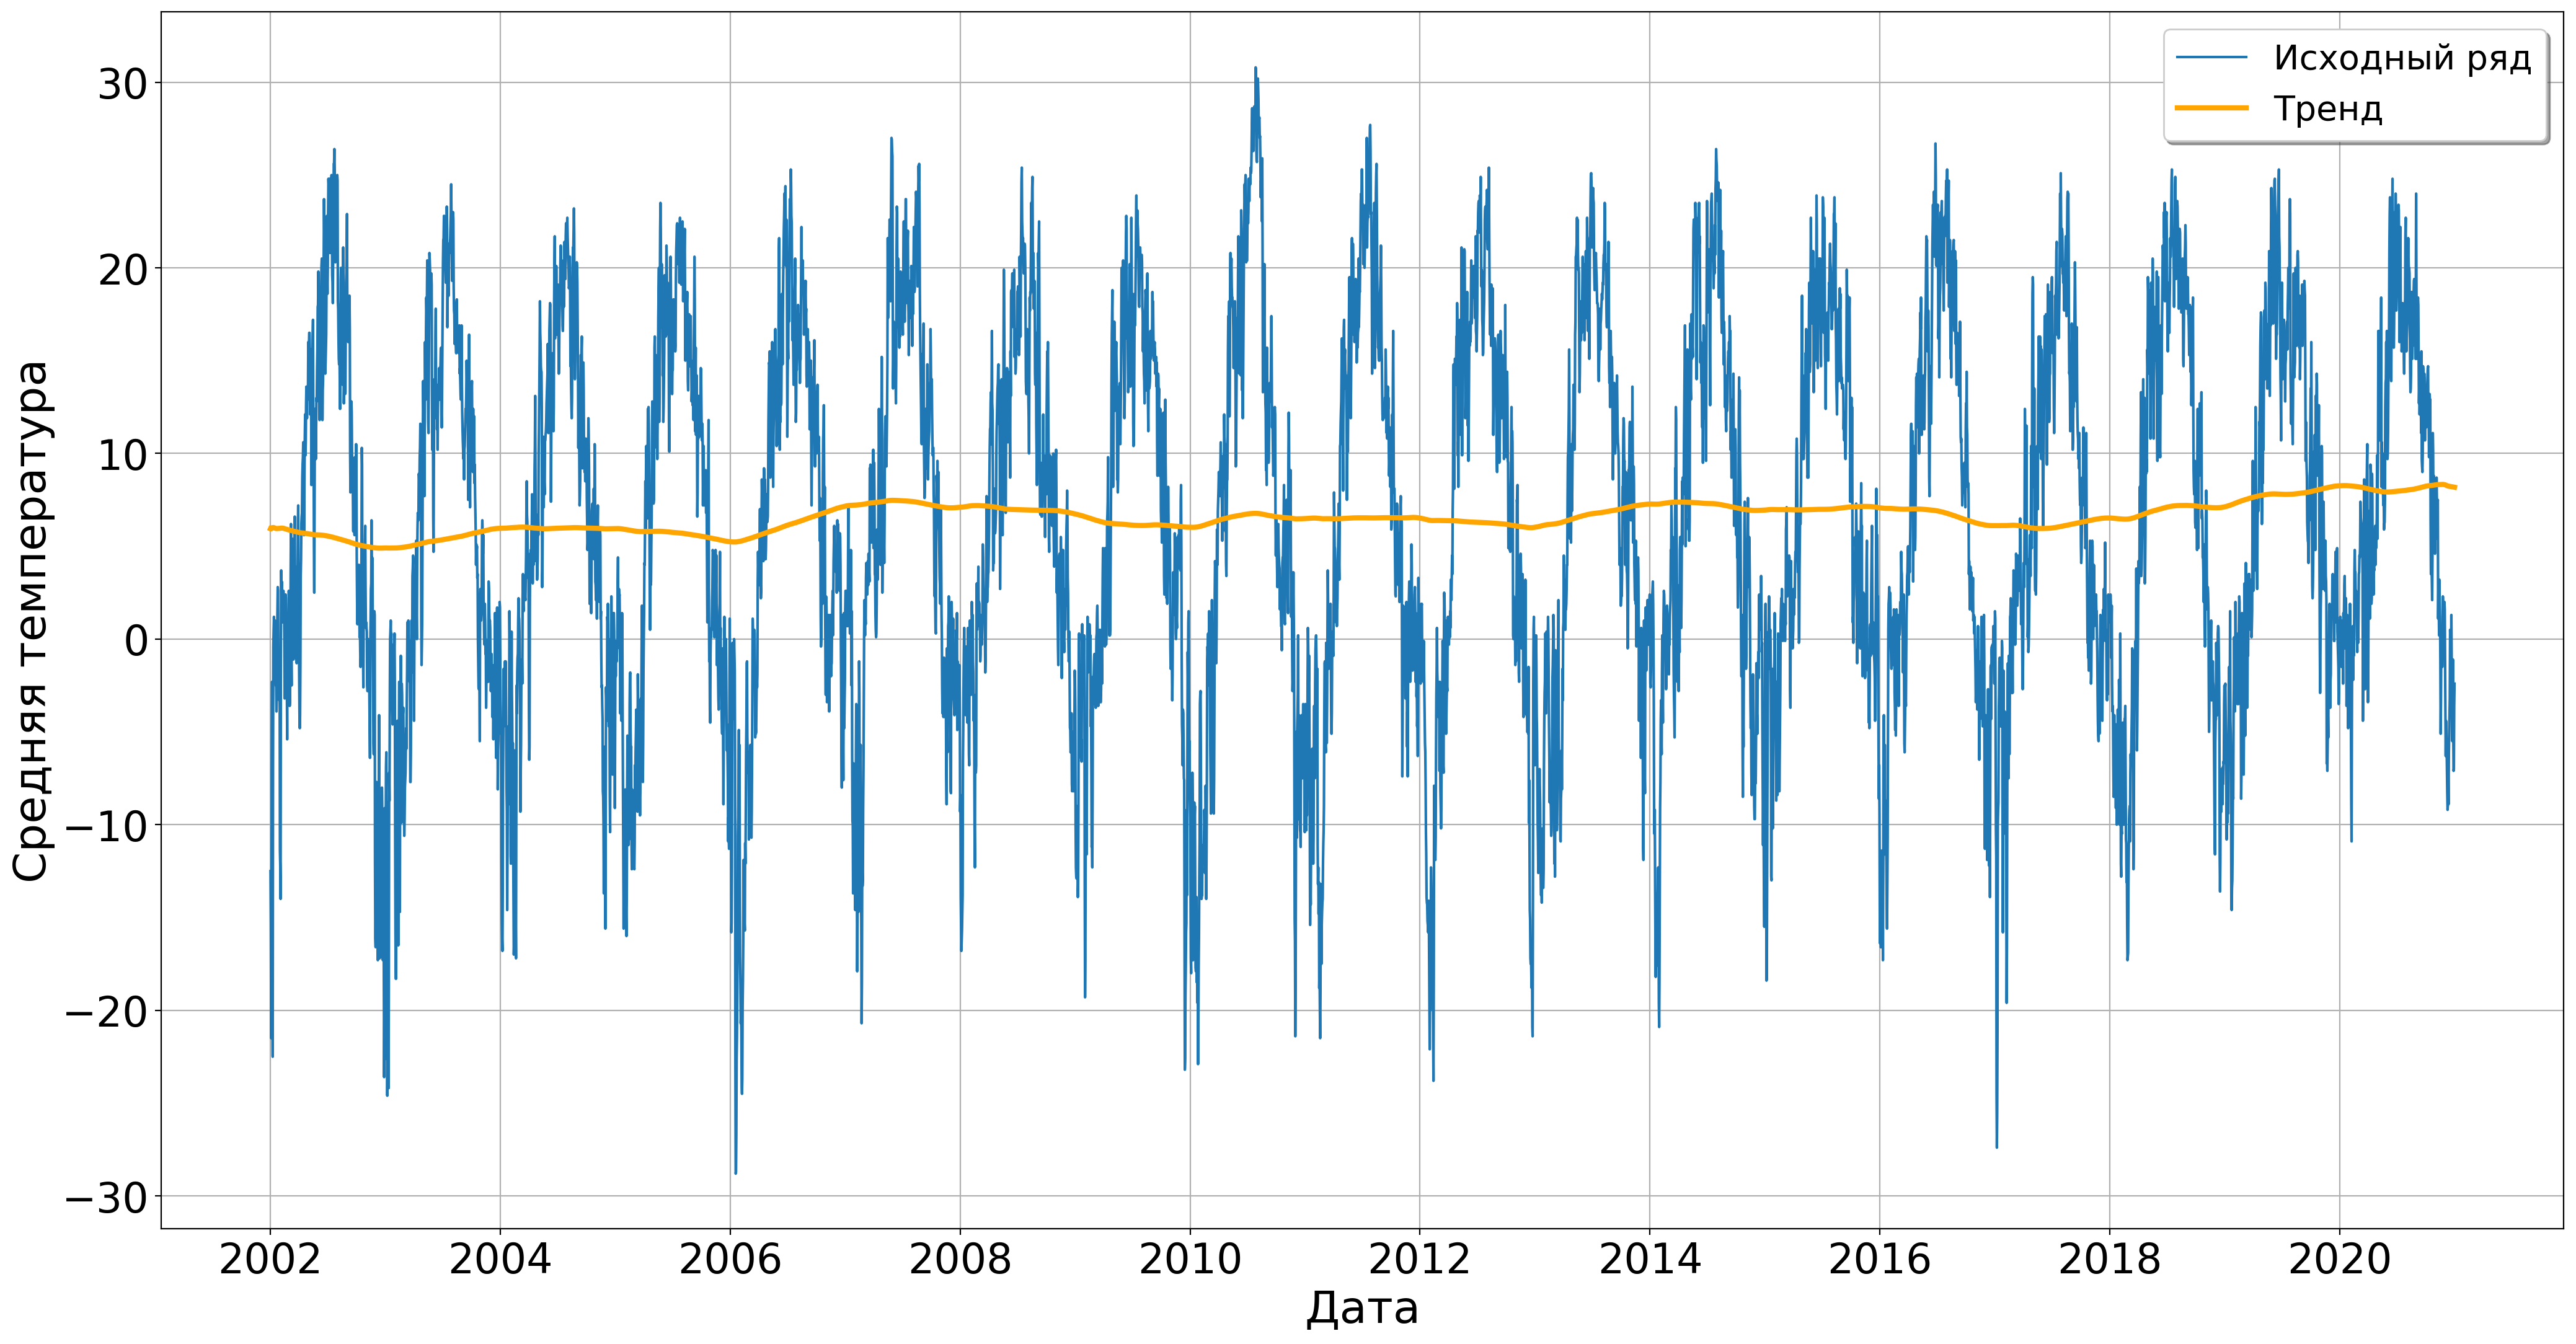

In [29]:
# График компоненты тренда
plt.figure(figsize=(25, 13), dpi=200)
plt.plot(date,temp)
plt.plot(date,ftrend, color='orange', linewidth=3)
plt.legend(['Исходный ряд', 'Тренд'], shadow=True, fontsize=20)
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24) 
plt.xlabel('Дата', size=26) 
plt.ylabel('Средняя температура', size=26)
plt.grid()

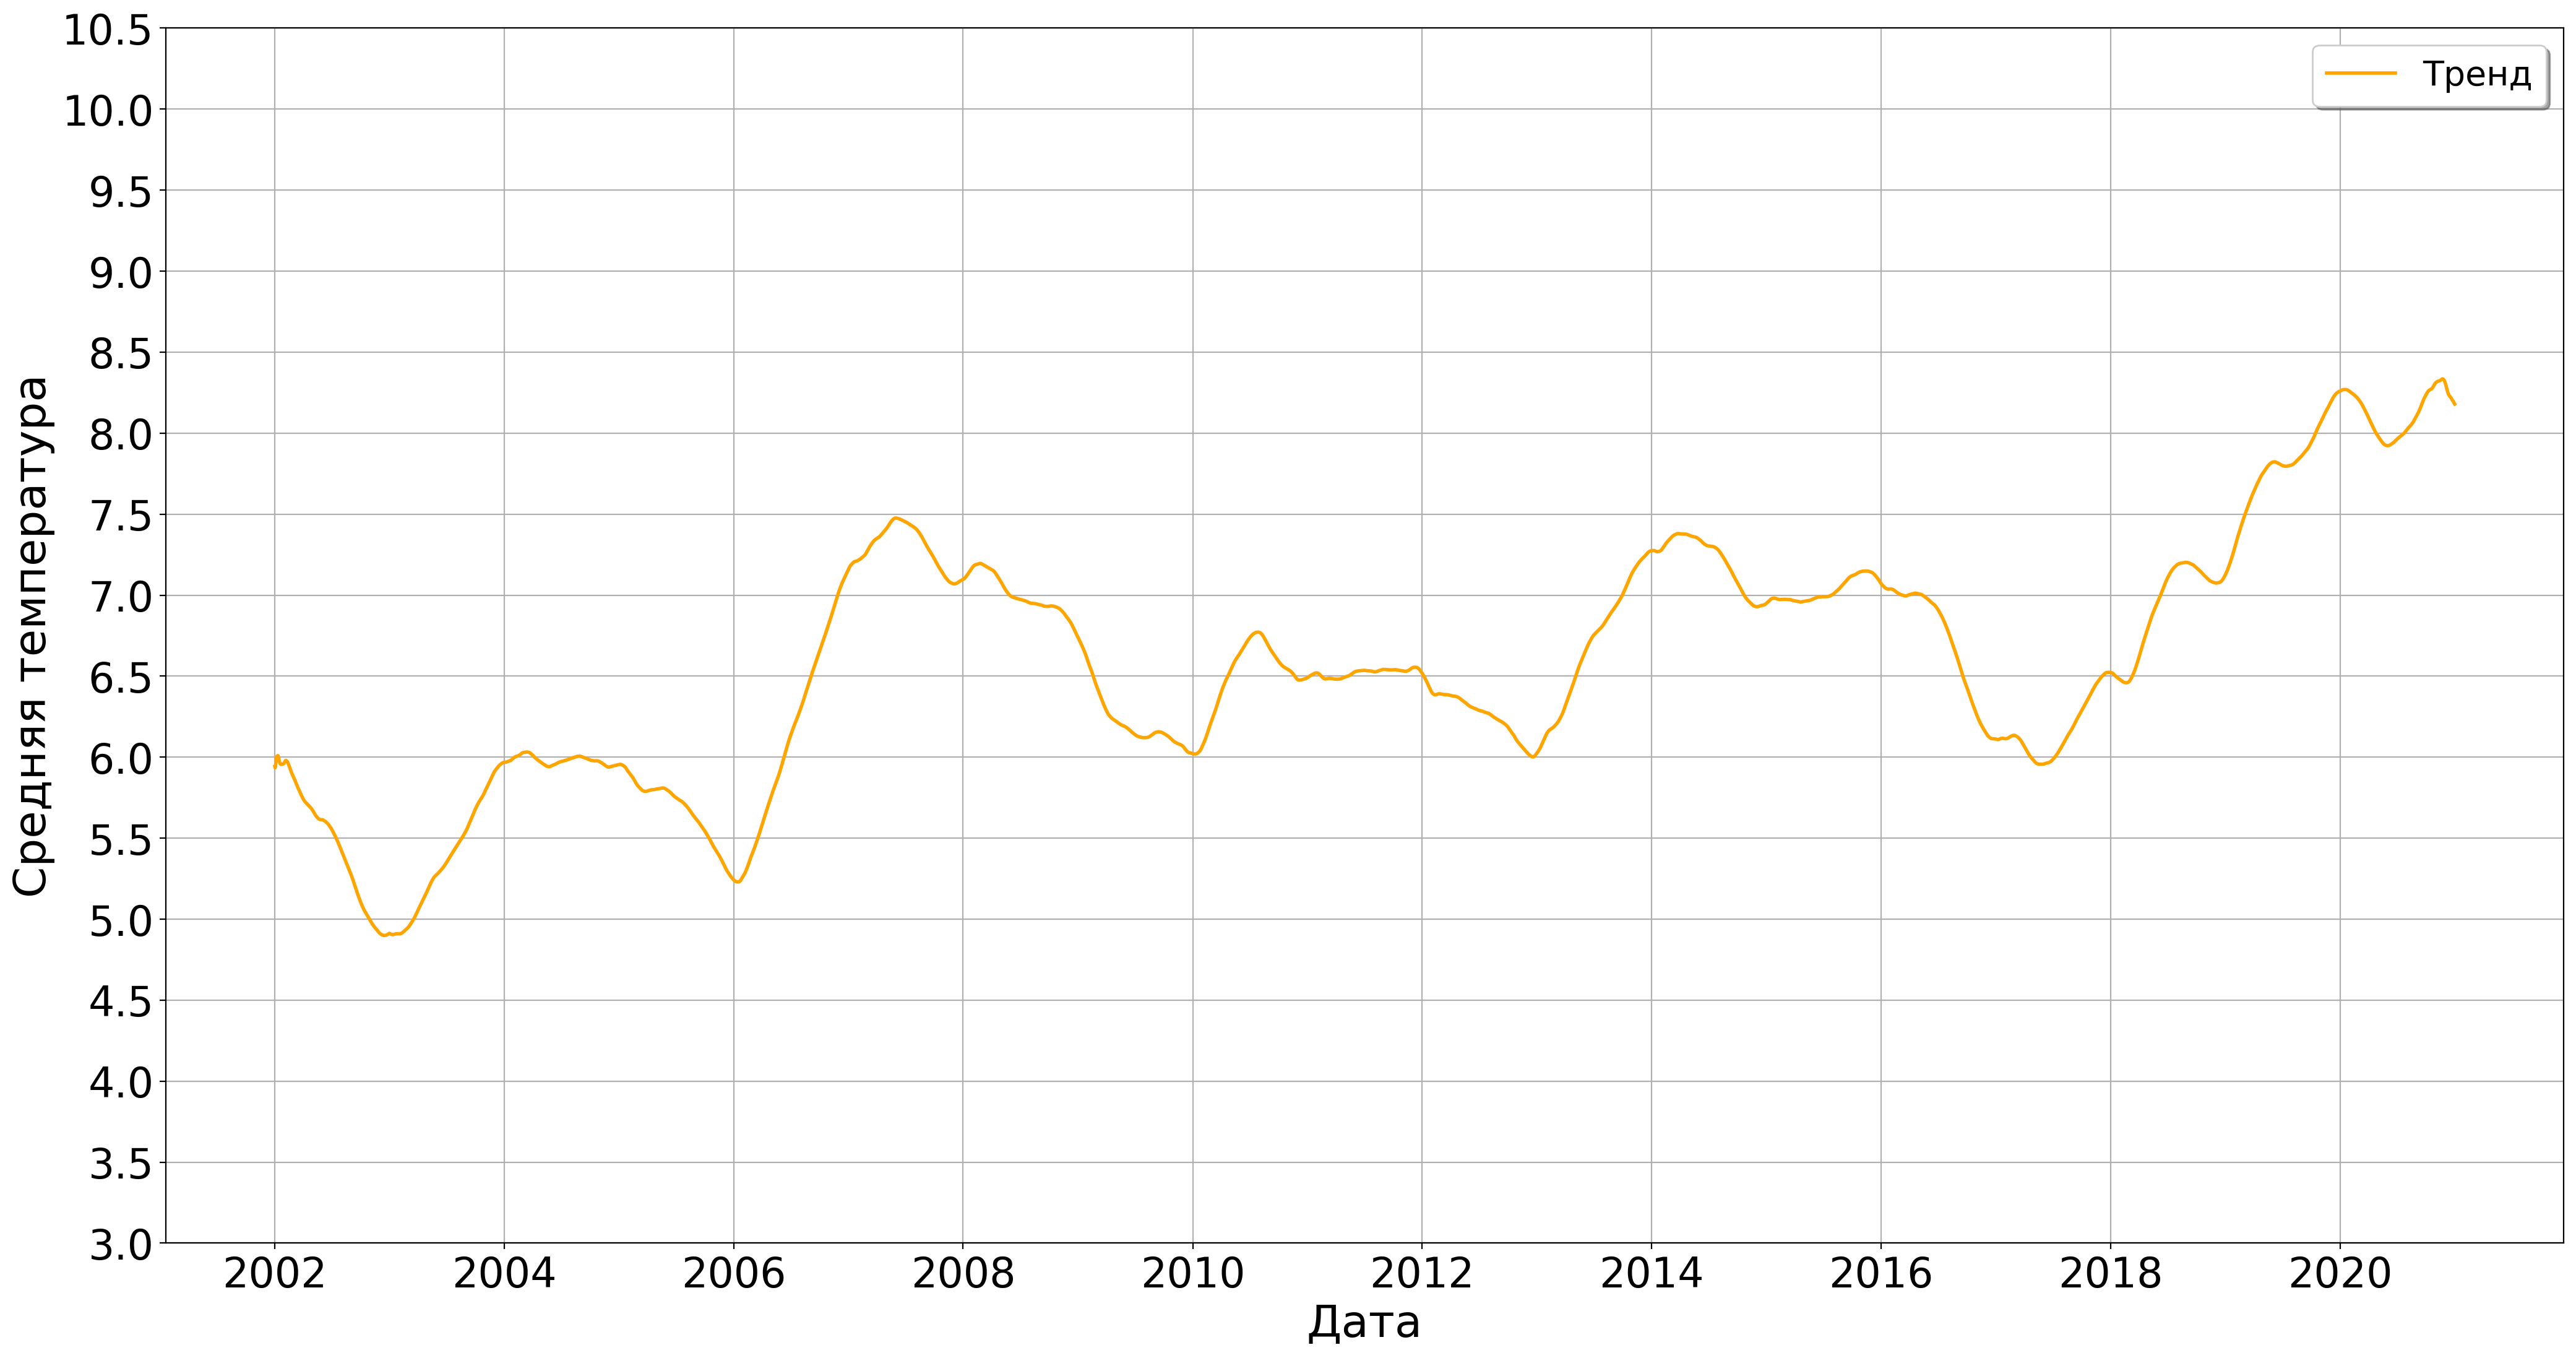

In [30]:
# Детализированный график компоненты тренда
plt.figure(figsize=(25, 13), dpi=200)
plt.plot(date,ftrend, color='orange', linewidth=2)
plt.legend(['Тренд'], shadow=True, fontsize=20)
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24) 
plt.xlabel('Дата', size=26) 
plt.ylabel('Средняя температура', size=26)
plt.yticks(np.arange(3, 11, 0.5))
plt.grid()

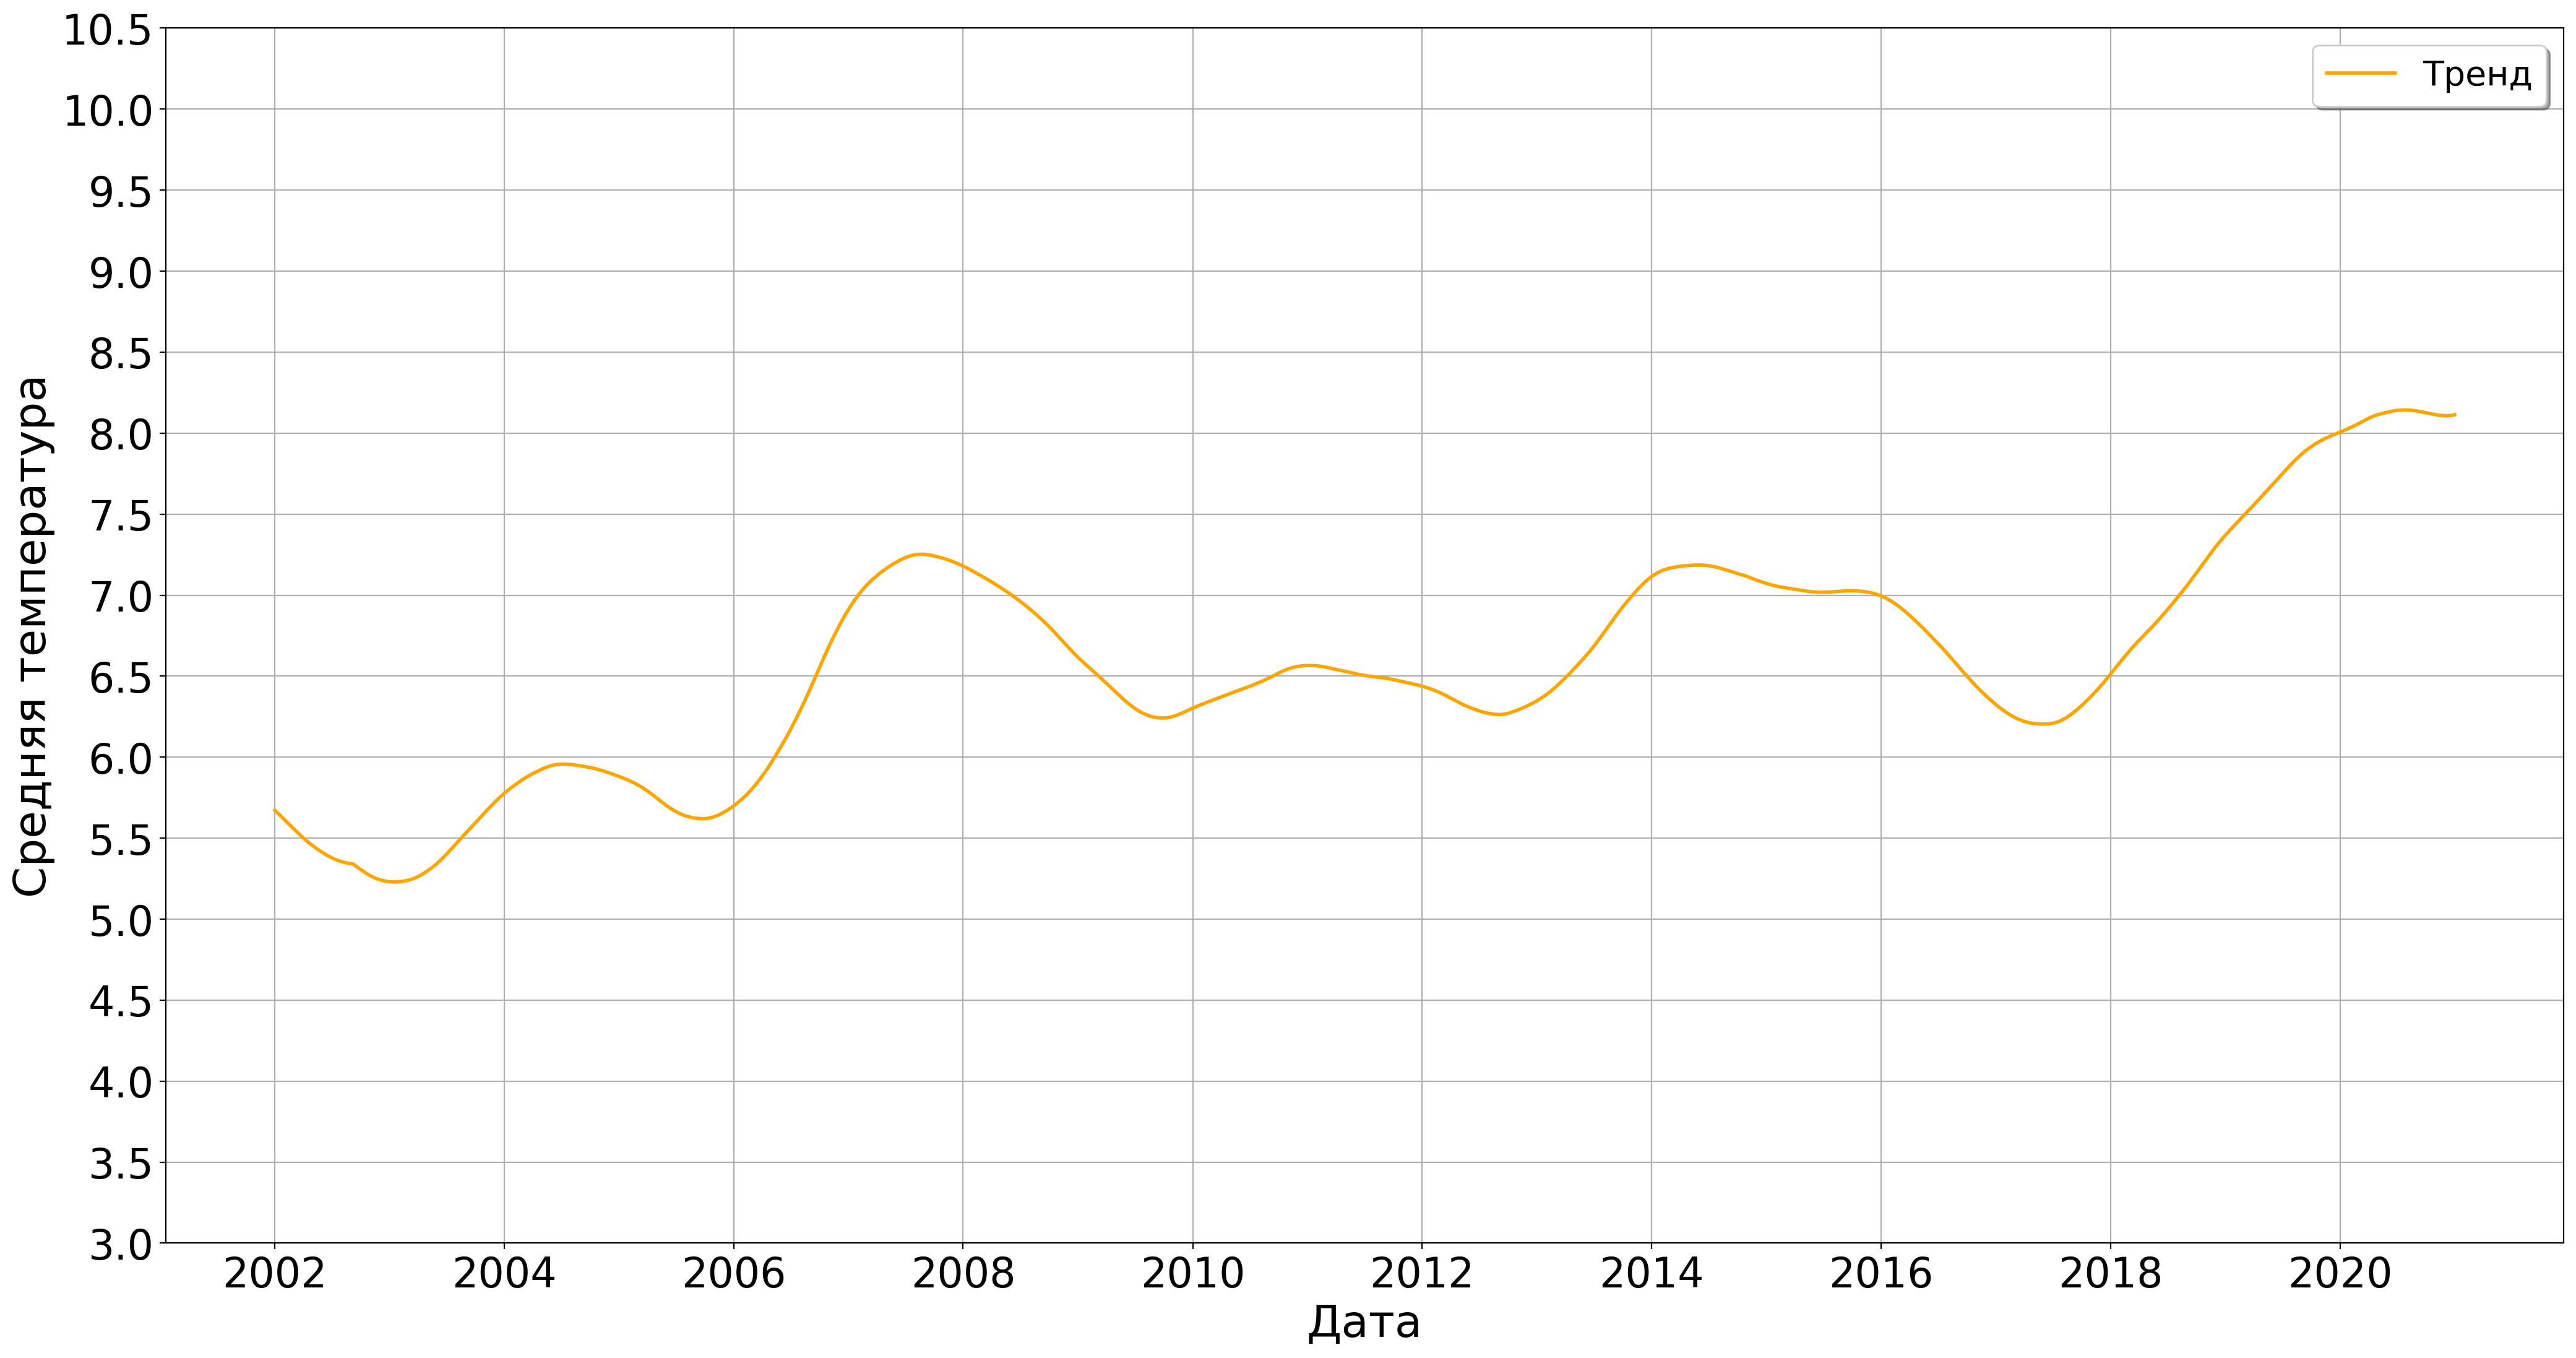

In [31]:
# Детализированный график компоненты тренда со сглаживанием
plt.figure(figsize=(25, 13), dpi=200)
plt.plot(date, moving_average(ftrend, 500), color='orange', linewidth=2)
plt.legend(['Тренд'], shadow=True, fontsize=20)
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24) 
plt.xlabel('Дата', size=26) 
plt.ylabel('Средняя температура', size=26)
plt.yticks(np.arange(3, 11, 0.5))
plt.grid()

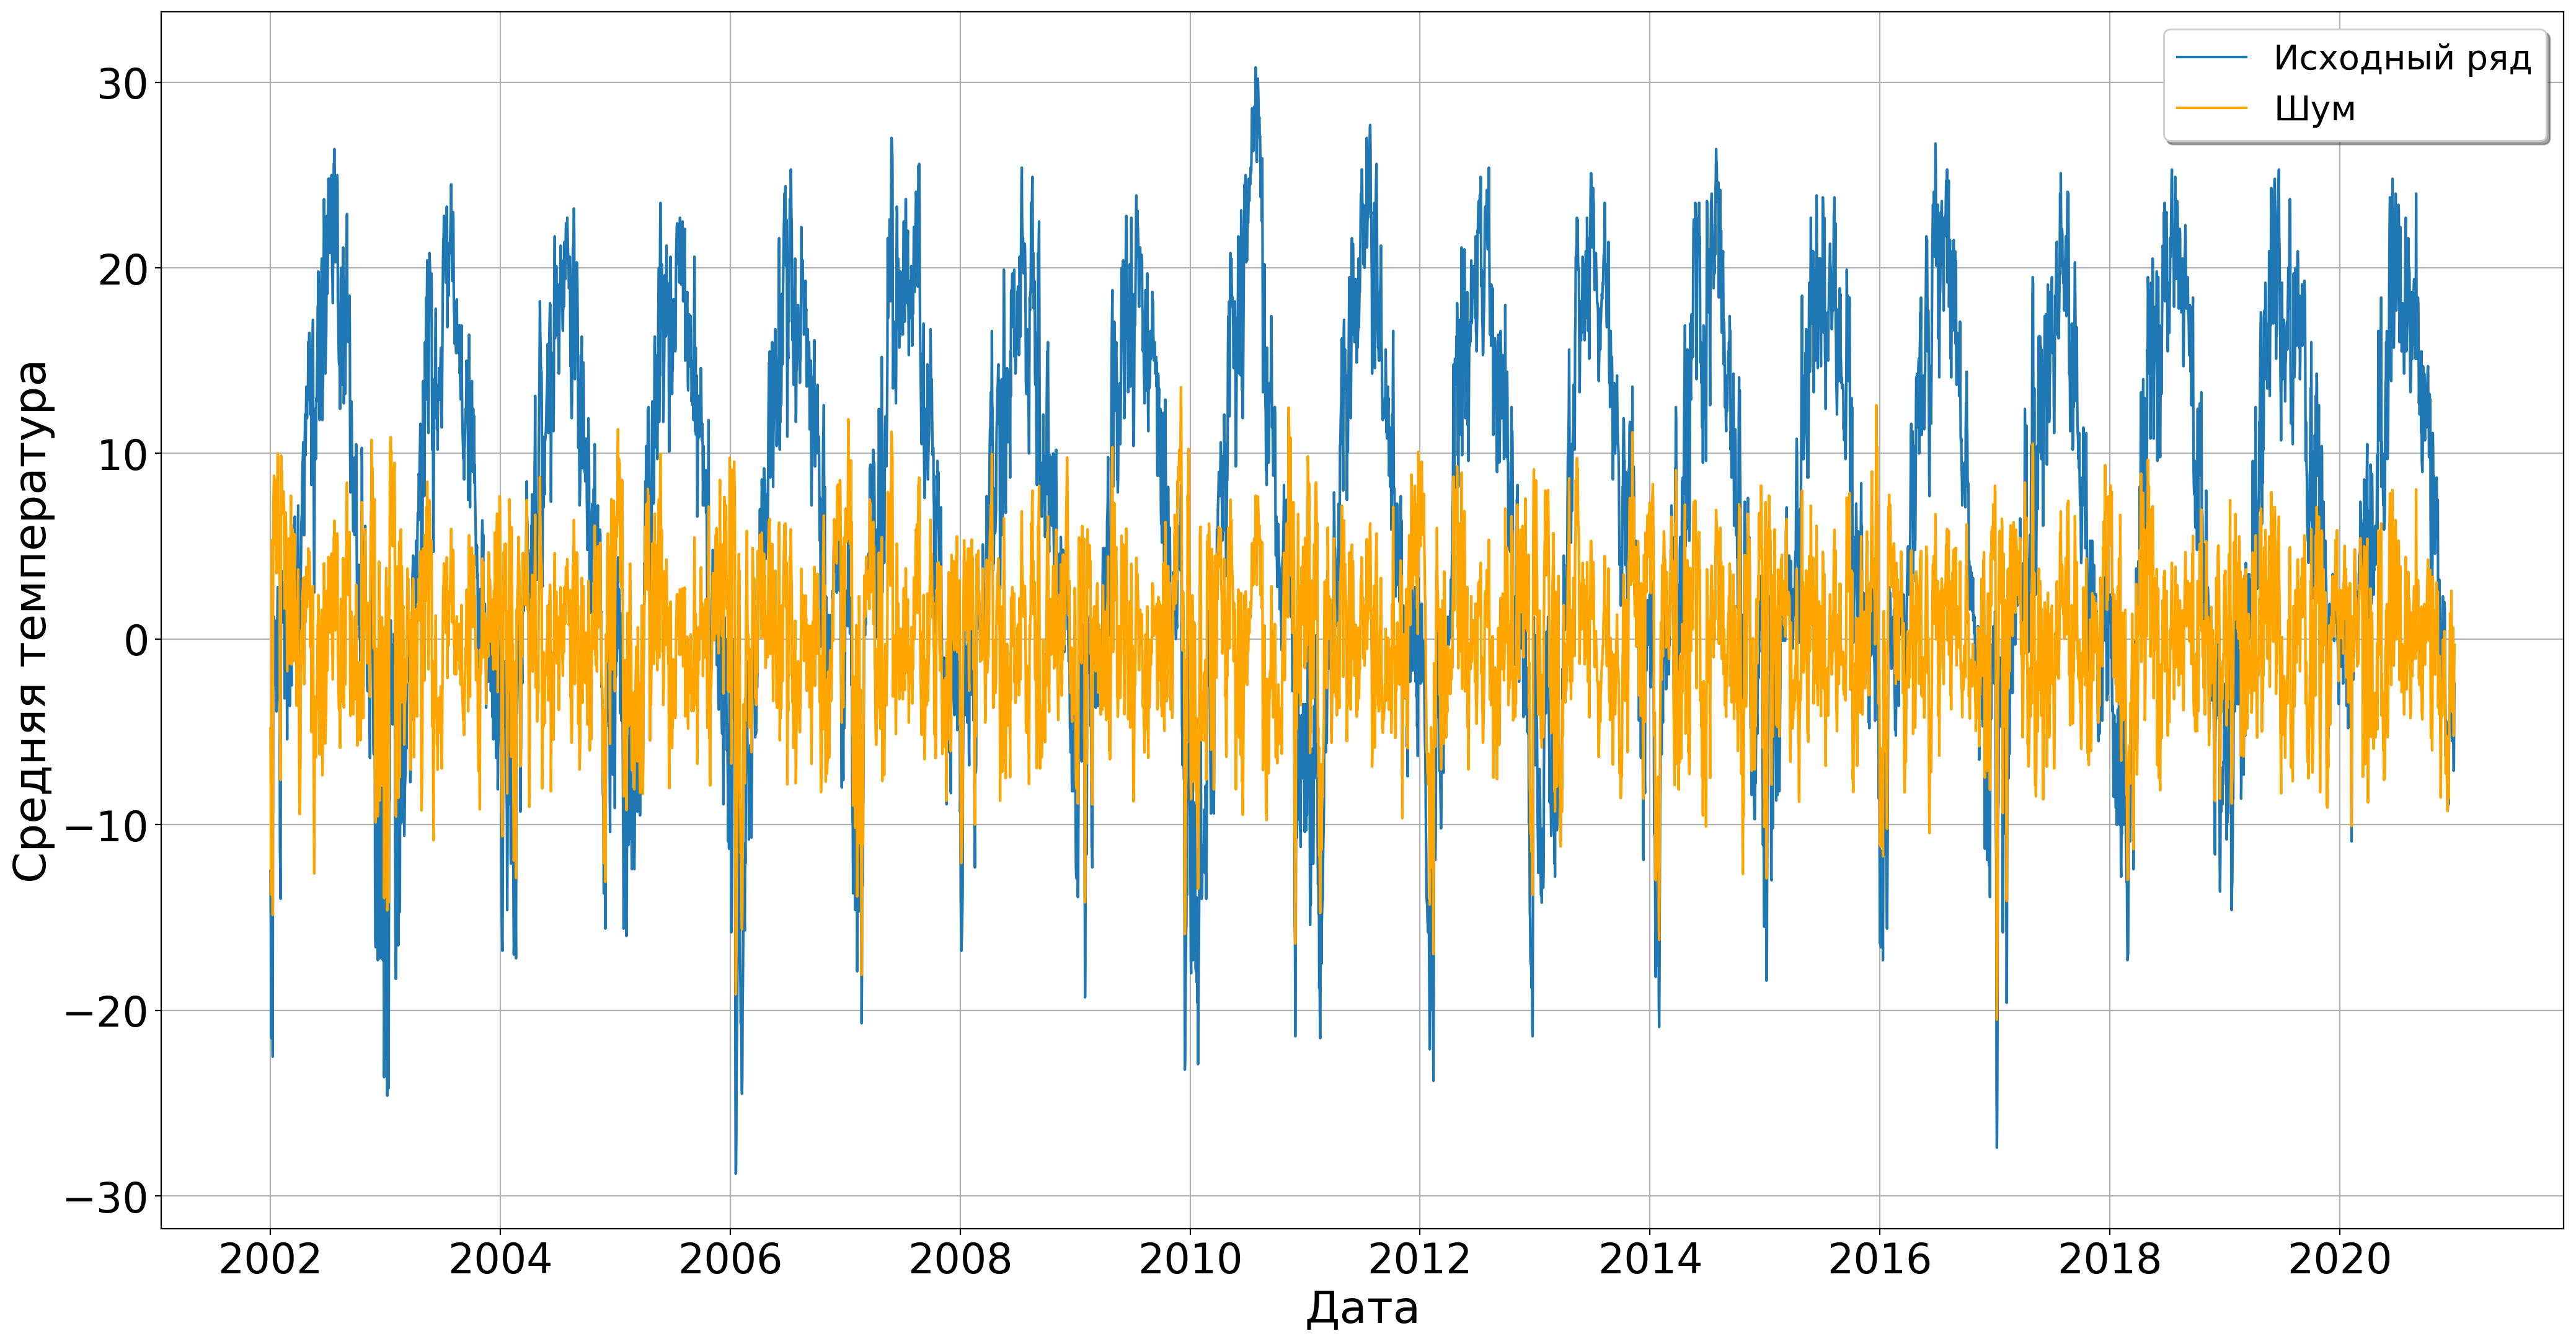

In [32]:
# График компоненты шума
plt.figure(figsize=(25, 13), dpi=200)
plt.plot(date,temp)
plt.plot(date,fnoize, color='orange')
plt.legend(['Исходный ряд', 'Шум'], shadow=True, fontsize=20)
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24) 
plt.xlabel('Дата', size=26) 
plt.ylabel('Средняя температура', size=26)
plt.grid()